<a href="https://colab.research.google.com/github/JabborovRoboCoder/Airline-Aviakompaniya-/blob/main/Aviakompaniya(customer_churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/aviakompaniya.zip"

Archive:  /content/aviakompaniya.zip
  inflating: sample_submission.csv   
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


In [84]:

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [83]:
df_tr = pd.read_csv("/content/train_dataset.csv")
df_ts = pd.read_csv("/content/test_dataset.csv")
s_s = pd.read_csv("/content/sample_submission.csv")

In [66]:
df_tr.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,4,2,4,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,3,5,4,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,4,4,3,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,2,2,2,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,4,3,4,4,5,2,5,3,5,4,0,10.0,0


In [67]:
print(df_tr.shape)
print(df_ts.shape)

(10000, 24)
(4000, 23)


In [68]:
print(df_tr.info())
print(df_ts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [8]:
print(df_tr.isnull().sum())
print("*********************************")
print(df_ts.isnull().sum())

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64
***************************

In [69]:
df_tr['satisfaction'].value_counts()

0    5000
1    5000
Name: satisfaction, dtype: int64

In [71]:
train_set,test_set = train_test_split(df_tr,test_size=0.2,random_state=42)

In [72]:
x_num = train_set.drop(["Gender","Customer Type","Type of Travel","Class","satisfaction"],axis=1)
x_train =train_set.drop(["satisfaction"], axis=1)
y = train_set["satisfaction"].copy()

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
    ('imputer',SimpleImputer(strategy='median'))
])

num_attribs = list(x_num)
cat_attribs = ["Gender","Customer Type","Type of Travel","Class"]

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

x_prepared =full_pipeline.fit_transform(x_train)

In [55]:
# Start Learning

In [73]:
x_test = test_set.drop(["satisfaction"],axis=1)
y_test = test_set["satisfaction"].copy()

In [74]:
x_test_prepared = full_pipeline.transform(x_test)

In [75]:
xgbc_model = XGBClassifier()
xgbc_model.fit(x_prepared,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
y_predicted = xgbc_model.predict(x_test_prepared)
print(metrics.classification_report(y_test,y_predicted))
print("Modelni aniqligi :" , metrics.accuracy_score(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Modelni aniqligi : 0.952


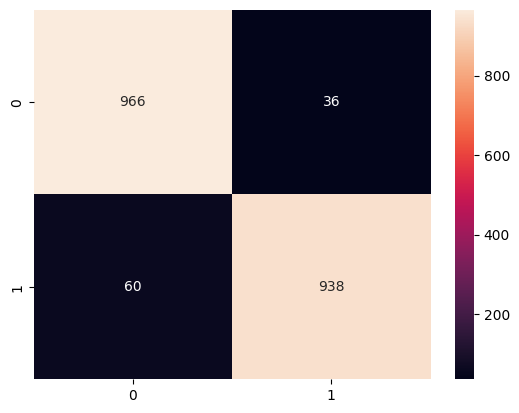

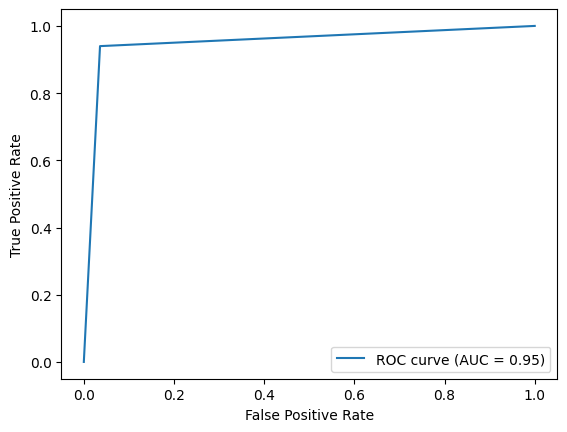

In [77]:
## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [79]:
# test_datasetni predict qilish va sample_submission ga bog'lash

In [94]:
x_test_prepared =full_pipeline.transform(df_ts)

pred_test_data = xgbc_model.predict(x_test_prepared)

abc=pd.DataFrame({'id':s_s.id,'satisfaction':pred_test_data})
abc.head()


,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [96]:
xgbc_model.score(x_prepared,y)

1.0